<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/GRU%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRU Models

## Tensorflow

Import Library & Load Dataset

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np


Preprocessing Data

In [6]:
# Parameter
num_words = 40000
maxlen = 400

# Load IMDb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Padding
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


Bangun Model GRU

In [7]:
def build_gru_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
        tf.keras.layers.GRU(128, return_sequences=True),
        tf.keras.layers.GRU(64),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


Training GRU

In [8]:
model_gru = build_gru_model()
history_gru = model_gru.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - accuracy: 0.6330 - loss: 0.6097 - val_accuracy: 0.7430 - val_loss: 0.5173
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 503s 2s/step - accuracy: 0.8663 - loss: 0.3296 - val_accuracy: 0.8540 - val_loss: 0.3499
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step - accuracy: 0.9500 - loss: 0.1428 - val_accuracy: 0.8742 - val_loss: 0.3555
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 518s 2s/step - accuracy: 0.9760 - loss: 0.0730 - val_accuracy: 0.8588 - val_loss: 0.4348
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 500s 2s/step - accuracy: 0.9887 - loss: 0.0355 - val_accuracy: 0.8582 - val_loss: 0.5509


Evaluasi GRU

In [9]:
def evaluate_model(model, x_test, y_test):
    y_probs = model.predict(x_test)
    y_pred = (y_probs >= 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    f1_squared = f1 ** 2
    auc = roc_auc_score(y_test, y_probs)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"F1 Squared: {f1_squared:.4f}")
    print(f"AUC: {auc:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - GRU")
    plt.legend()
    plt.grid()
    plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 153ms/step
Accuracy: 0.8407
Precision: 0.9016
Recall: 0.7649
F1 Score: 0.8276
F1 Squared: 0.6850
AUC: 0.9259


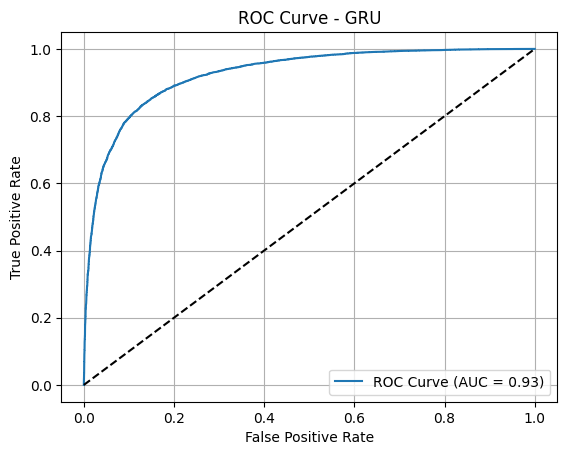

In [10]:
evaluate_model(model_gru, x_test, y_test)


Visualisasi Akurasi & Loss

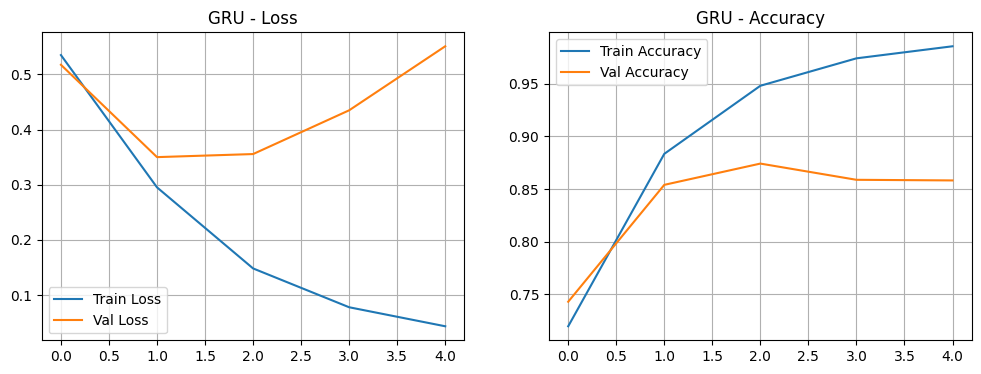

In [11]:
def plot_history(history, title=''):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    plt.grid()

    plt.show()

plot_history(history_gru, title='GRU')


## Pytorch

Import Library & Load Dataset

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


Preprocessing Dataset

In [13]:
# Parameter
num_words = 40000
maxlen = 400

# Load IMDb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Padding
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Convert to tensor
x_train_tensor = torch.tensor(x_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)


GRU Model

In [14]:
class GRUClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(GRUClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.gru = nn.GRU(embed_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=0.3)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        out, h_n = self.gru(x)
        x = h_n[-1]  # hidden state terakhir
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x).squeeze()


Training GRU

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GRUClassifier(vocab_size=num_words, embed_size=128, hidden_size=64, num_layers=2).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []

for epoch in range(3):
    model.train()
    epoch_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}: Train Loss = {avg_loss:.4f}")


Epoch 1: Train Loss = 0.5833
Epoch 2: Train Loss = 0.3811
Epoch 3: Train Loss = 0.2463


Evaluasi Model GRU

In [16]:
model.eval()
y_true = []
y_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        y_probs.extend(outputs.cpu().numpy())
        y_true.extend(labels.numpy())

y_pred = np.array(y_probs) >= 0.5
y_true = np.array(y_true)


In [17]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)
f1_squared = f1 ** 2
auc = roc_auc_score(y_true, y_probs)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F1 Squared: {f1_squared:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.8843
Precision: 0.8897
Recall: 0.8773
F1 Score: 0.8835
F1 Squared: 0.7805
AUC: 0.9528


Visualisasi Loss & ROC

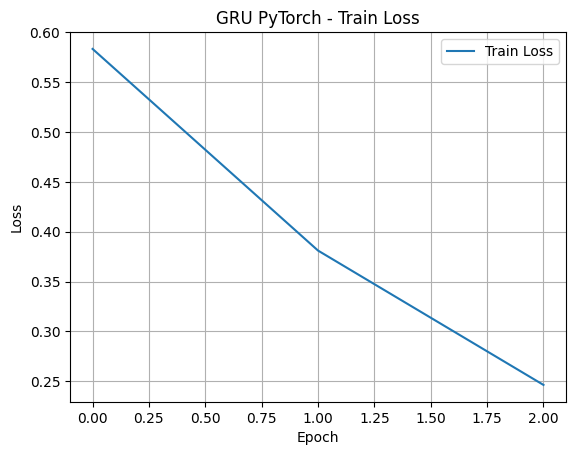

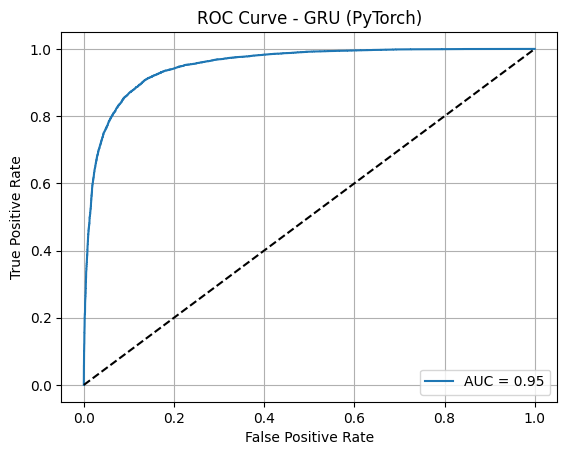

In [18]:
# Loss
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("GRU PyTorch - Train Loss")
plt.legend()
plt.grid()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GRU (PyTorch)")
plt.legend()
plt.grid()
plt.show()
